In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data_path = 'C:\\Users\\DELL\\ML\\fruits-360\\train2\\only train'

images = []
labels = []


for dir in os.listdir(data_path):
    if not dir.startswith('.'):
        path = os.path.join(data_path, dir)
        print(dir)

        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = img.flatten()
            images.append(img)
            labels.append(dir)

numpyArray = np.array(images)
# np.random.shuffle(numpyArray)
# numpyArray2 = np.array(labels)

Apple Red 1
Avocado
Banana
Blueberry
Watermelon


In [3]:
kmeans_model = KMeans(n_clusters=5, random_state=40)
kmeans_model.fit(numpyArray)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=40)

In [4]:
cluster_labels = kmeans_model.labels_
cluster_labels

array([2, 2, 2, ..., 4, 4, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cluster is :0
Cluster is :1
Cluster is :2
Cluster is :3
Cluster is :4


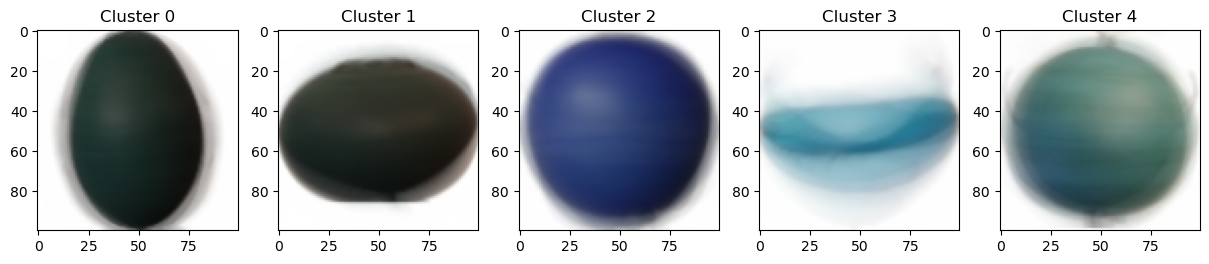

In [5]:
# for i in range(5):
#     center_image = kmeans_model.cluster_centers_[i]
#     center_image = center_image.reshape(100, 100, 3)
#     print("Cluster is :" + str(i))
#     plt.imshow(center_image)
#     plt.show()
############################################
# fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# for i in range(5):
#     center_image = kmeans_model.cluster_centers_[i]
#     center_image = center_image.reshape(100, 100, 3)
#     print("Cluster is :" + str(i))
#     axes[i].imshow(center_image)
#     axes[i].set_title(f'Cluster {i}')

# plt.show()
#####
# Normalize pixel values to be in the range [0, 255]
numpyArray = numpyArray / 255.0

# Reshape the flattened images to their original shape
reshaped_images = numpyArray.reshape((-1, 100, 100, 3))

# Create subplots for visualization
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    center_image = kmeans_model.cluster_centers_[i]
    center_image = center_image.reshape(100, 100, 3)
    print("Cluster is :" + str(i))
    
    # Normalize pixel values to be in the range [0, 255]
    center_image = center_image / 255.0
    
    axes[i].imshow(center_image)
    axes[i].set_title(f'Cluster {i}')

plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score,log_loss

from sklearn.preprocessing import label_binarize
from itertools import cycle

In [7]:
X_train, X_test, y_train, y_test = train_test_split(numpyArray, cluster_labels, random_state=40, test_size=0.2)

# X_train, X_test, y_train, y_test = train_test_split(numpyArray, numpyArray2, test_size=0.4)

y_train.shape
X_train.shape

(23, 30000)

In [9]:
y_train.shape
X_train.shape
logreg_model = LogisticRegression(random_state=40)
logreg_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

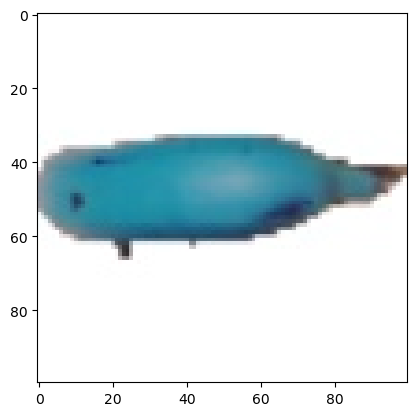

In [10]:
img = cv2.imread("C:\\Users\\DELL\\ML\\fruits-360\\test2\\Banana\\r_235_100.jpg")
plt.imshow(img)

In [11]:
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)

print("accuracy:", accuracy)

accuracy: 0.8743004735256135


In [12]:
# fruits = [ "Avocado","Blueberry", "apple", "banana", "watermelon"]

# print(img.flatten().reshape(1, -1).shape)
# .reshape(1, -1).shape

In [13]:
y = logreg_model.predict(img.flatten().reshape(1, -1))
index = y[0]
print(index)

3


In [14]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
# print(conf_matrix)
pd.DataFrame(conf_matrix).style.background_gradient(cmap = "inferno")

Confusion Matrix:


,0,1,2,3,4
0,297,0,4,0,0
1,0,132,1,0,231
2,0,0,650,0,12
3,0,0,0,405,21
4,10,0,1,12,547


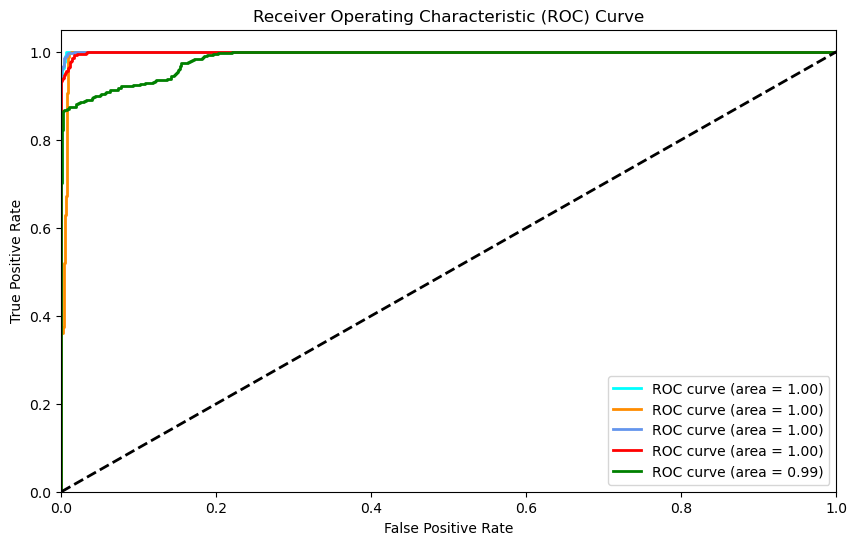

In [15]:
# Plot ROC curve
if len(np.unique(y_test)) > 2:
    # If multiclass, convert y_test to one-hot encoding
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
else:
    n_classes = 1
    y_test_bin = y_test

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], logreg_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))

# Plotting each class's ROC curve
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()